<a href="https://colab.research.google.com/github/nooraovo/nooraovo.github.io/blob/main/Multi_neuron_exp1_new3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class TwoLayerNN(nn.Module):
  def __init__(self, m, d): # fix the second layer to be all 1
    super().__init__()
    self.fc1 = nn.Linear(d, m, bias=False)
    self.fc2 = torch.ones([m, 1])

  def activation(self, x): # cubic relu activation
    return (x.clamp(min=0))**3

  def forward(self, x):
    _output = self.activation(self.fc1(x))
    output = torch.matmul(_output, self.fc2)
    return output

In [ ]:
n = 10
D_in = 20
D_out = 1
m = 8

def get_data(n, D_in):
  x=torch.randn(n,D_in)
  torch.nn.init.normal_(x, 0, 1) # initialize x

  u=torch.rand(D_in,D_out)
  u=u/u.norm() # ||u||=1
  y=x.mm(u)
  y=y.clamp(min=0)
  y=y**3

  return x, y

In [ ]:
x, y = get_data(n, D_in)
model =  TwoLayerNN(m, D_in)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=.9, weight_decay=0)
criteria = nn.MSELoss()

In [ ]:
def weights_init(m):
  for p in m.parameters():
    nn.init.xavier_uniform_(p, gain=.1)

def train(epochs, lr):
  model =  TwoLayerNN(m, D_in)
  model.apply(weights_init)
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0, weight_decay=0)

  model.train()
  res = []
  for epoch in range(epochs):
    output = model(x)
    loss = criteria(output, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    tmp = []
    for p in model.parameters():
      tmp += [(p.clone().detach()**2).sum(dim=-1).numpy()]

    res += [tmp]
    if epoch % 100 == 0:
      print (epoch, loss.item())

  return np.array(res)

In [ ]:
lr_small = 0.00005
norm_small = train(50000, lr=lr_small)

0 0.5885326862335205
100 0.5877020955085754
200 0.5867578983306885
300 0.5856791138648987
400 0.584440290927887
500 0.583010196685791
600 0.5813498497009277
700 0.5794104337692261
800 0.5771304965019226
900 0.5744326710700989
1000 0.5712171792984009
1100 0.567355751991272
1200 0.5626824498176575
1300 0.5569798946380615
1400 0.5499624609947205
1500 0.5412532091140747
1600 0.5303540229797363
1700 0.5166085362434387
1800 0.49916309118270874
1900 0.476936399936676
2000 0.4486324191093445
2100 0.41286522150039673
2200 0.3685198128223419
2300 0.3154989182949066
2400 0.25584396719932556
2500 0.1946440488100052
2600 0.13935552537441254
2700 0.09666261821985245
2800 0.06888681650161743
2900 0.0535489097237587
3000 0.0461614616215229
3100 0.04292901232838631
3200 0.04157562926411629
3300 0.04099239781498909
3400 0.040705036371946335
3500 0.04052654653787613
3600 0.040386687964200974
3700 0.040259815752506256
3800 0.0401366762816906
3900 0.04001392796635628
4000 0.03989032655954361
4100 0.0397653

In [ ]:
lr_large = 0.03
norm_large = train(10000, lr=lr_large)

0 0.5872529745101929
100 0.022588446736335754
200 0.020548555999994278
300 0.02027241513133049
400 0.01937936060130596
500 0.015868190675973892
600 0.009297817945480347
700 0.005053401924669743
800 0.0030881138518452644
900 0.002087507862597704
1000 0.0015093109104782343
1100 0.0011416998459026217
1200 0.0008912271005101502
1300 0.0007117231143638492
1400 0.000578215520363301
1500 0.000475994311273098
1600 0.00039591832319274545
1700 0.00033207470551133156
1800 0.00028031424153596163
1900 0.0002379818761255592
2000 0.00020291136752348393
2100 0.00017378923075739294
2200 0.00014925732102710754
2300 0.00012856884859502316
2400 0.00011100680421805009
2500 9.600568591849878e-05
2600 8.31941215437837e-05
2700 7.221098348964006e-05
2800 6.278077489696443e-05
2900 5.4662948969053105e-05
3000 4.7664660087320954e-05
3100 4.159550371696241e-05
3200 3.6343379179015756e-05
3300 3.1802846933715045e-05
3400 2.785100878099911e-05
3500 2.4405944714089856e-05
3600 2.1416313757072203e-05
3700 1.88219109

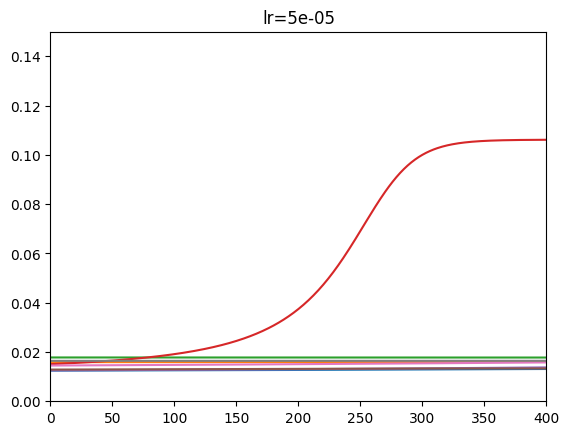

In [ ]:
for i in range(m):
  plt.xlim(0, 400)
  plt.ylim(0, 0.15)
  plt.plot(norm_small[::10, 0, i])
  plt.title('lr={0}'.format(lr_small))
  #plt.plot(log2[::10, 1, i])

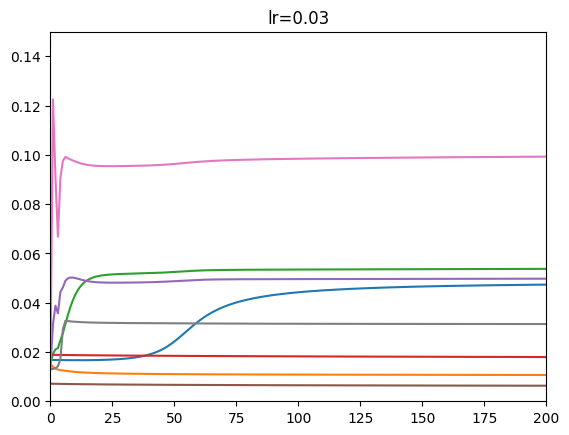

In [ ]:
for i in range(m):
  plt.xlim(0, 200)
  plt.ylim(0, 0.15)
  plt.plot(norm_large[::10, 0, i])
  plt.title('lr={0}'.format(lr_large))